In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
%matplotlib inline

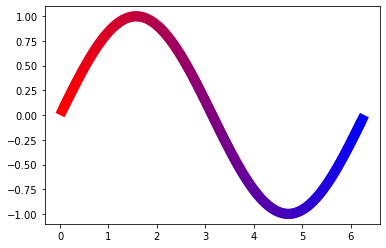

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

cmap = LinearSegmentedColormap.from_list("", [(1, 0, 0), (0, 0, 1)])

points = np.array([x, y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-2],points[1:-1], points[2:]], axis=1)

lc = LineCollection(segments, cmap=cmap, linewidth=10)
lc.set_array(x)
plt.gca().add_collection(lc)
plt.gca().autoscale()

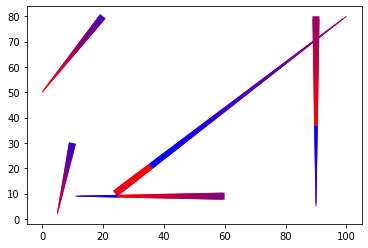

In [3]:
x1 = np.array([0,90,100,5,11])
x2 = np.array([20,90,24,10,60])
y1 = np.array([50,5,80,2,9])
y2 = np.array([80,80,10,30,9])
n_segments = 70
x = np.linspace(x1,x2,n_segments+2)
y = np.linspace(y1,y2,n_segments+2)
points = np.array([x, y]).T
points = np.expand_dims(points,1)
segments = np.concatenate([points[:,:,:-2,:],points[:,:,1:-1,:],points[:,:,2:,:]],axis=1)
segments = np.transpose(segments,(0,2,1,3)).reshape(-1,3,2)
lw = np.linspace(1,7,n_segments)
#lc = LineCollection(segments3, cmap=cmap, linewidth=lw)
lc = LineCollection(segments, cmap=cmap, linewidth=lw,snap=False)
pitch_x = np.linspace(0,100,100)
lc.set_array(pitch_x)
plt.gca().add_collection(lc)
plt.gca().autoscale()